In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and Understanding Data

In [2]:
day = pd.read_csv("day.csv")

In [3]:
day.head(14)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Drop columns that are not useful for analysis

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [4]:
day.drop(columns=["instant","dteday","casual","registered"],inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


- we can see that features like `season, mnth, weekday and  weathersit` are integers although they should be non-numerical categories.

In [6]:
day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

- There are no missing values in any of the columns

## Data preparation before EDA

### Convert season and  weathersit to categorical types

In [7]:
day.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

day.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

day.mnth = day.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

day.weekday = day.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


#### weathersit categories : 
- `good` - Clear, Few clouds, Partly cloudy, Partly cloudy
- `moderate` - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- `bad` - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- `severe` - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## Check for Outliers

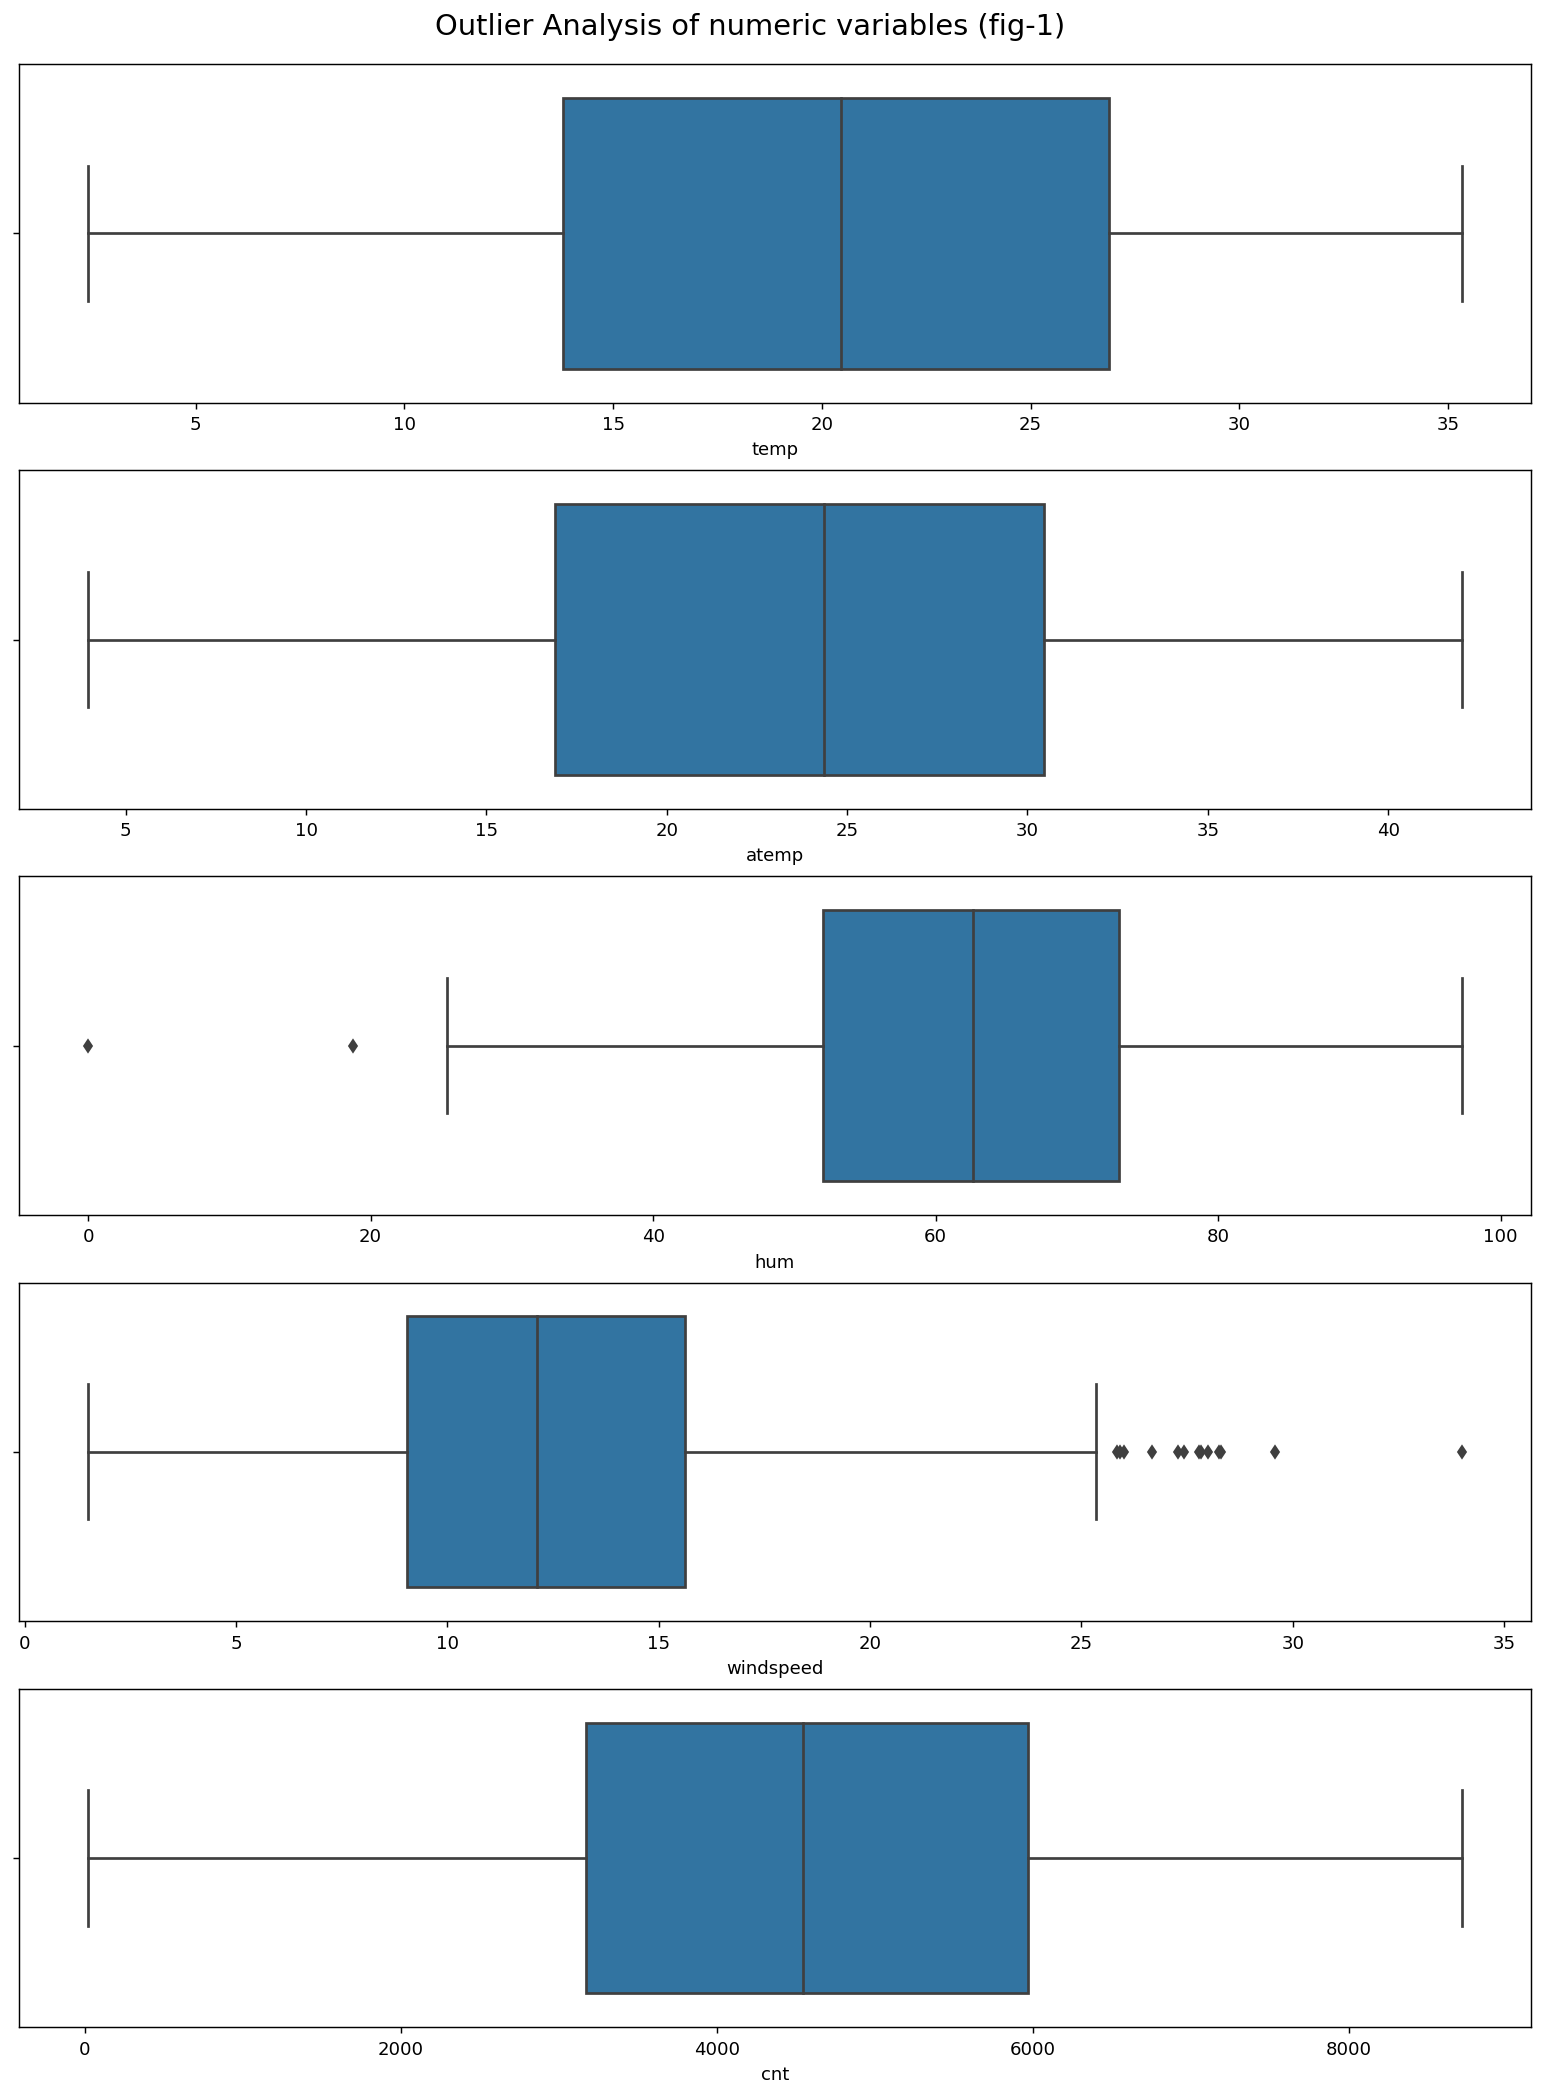

In [8]:
numeric_cols =['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(15,20),dpi=130)
for i,col_name in enumerate(numeric_cols,start=1):
    plt.subplot(5,1,i)
    sns.boxplot(day[col_name])

plt.suptitle("Outlier Analysis of numeric variables (fig-1)",fontsize = 16,y=0.9)
plt.show()

#### Outlier analsysis fig-1:
- windspeed and hum show some presence of outliers.
- As these values are close to outer bounds, we may not not take any actions in removing them.

In [9]:
day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Univariate Analysis

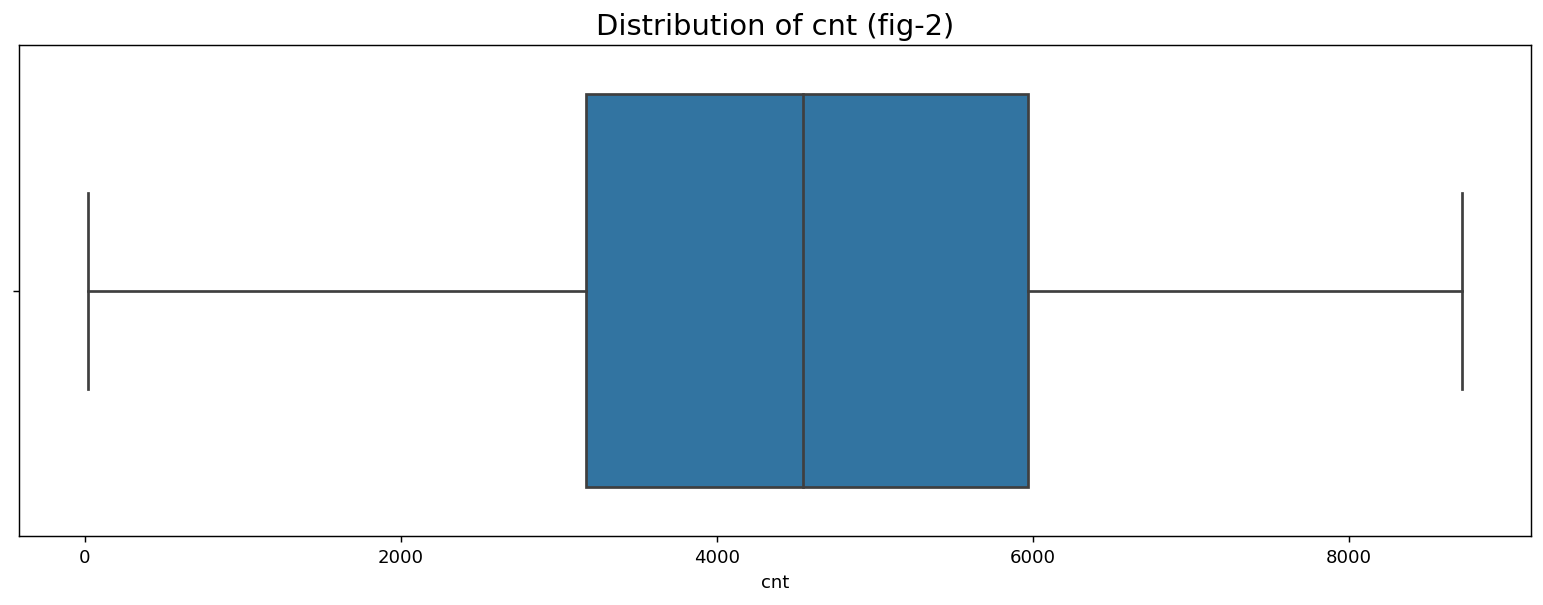

In [10]:
plt.figure(figsize=(15,5),dpi=130)
plt.title("Distribution of cnt (fig-2)",fontsize=16)
sns.boxplot(day.cnt)
plt.show()

#### As shown in fig-2:
- `cnt` is concentrated mostly between 30K approx to 60K and mean around 45K.
- Distribution is also symmetric indicating it has approximately same mean, median and mode values

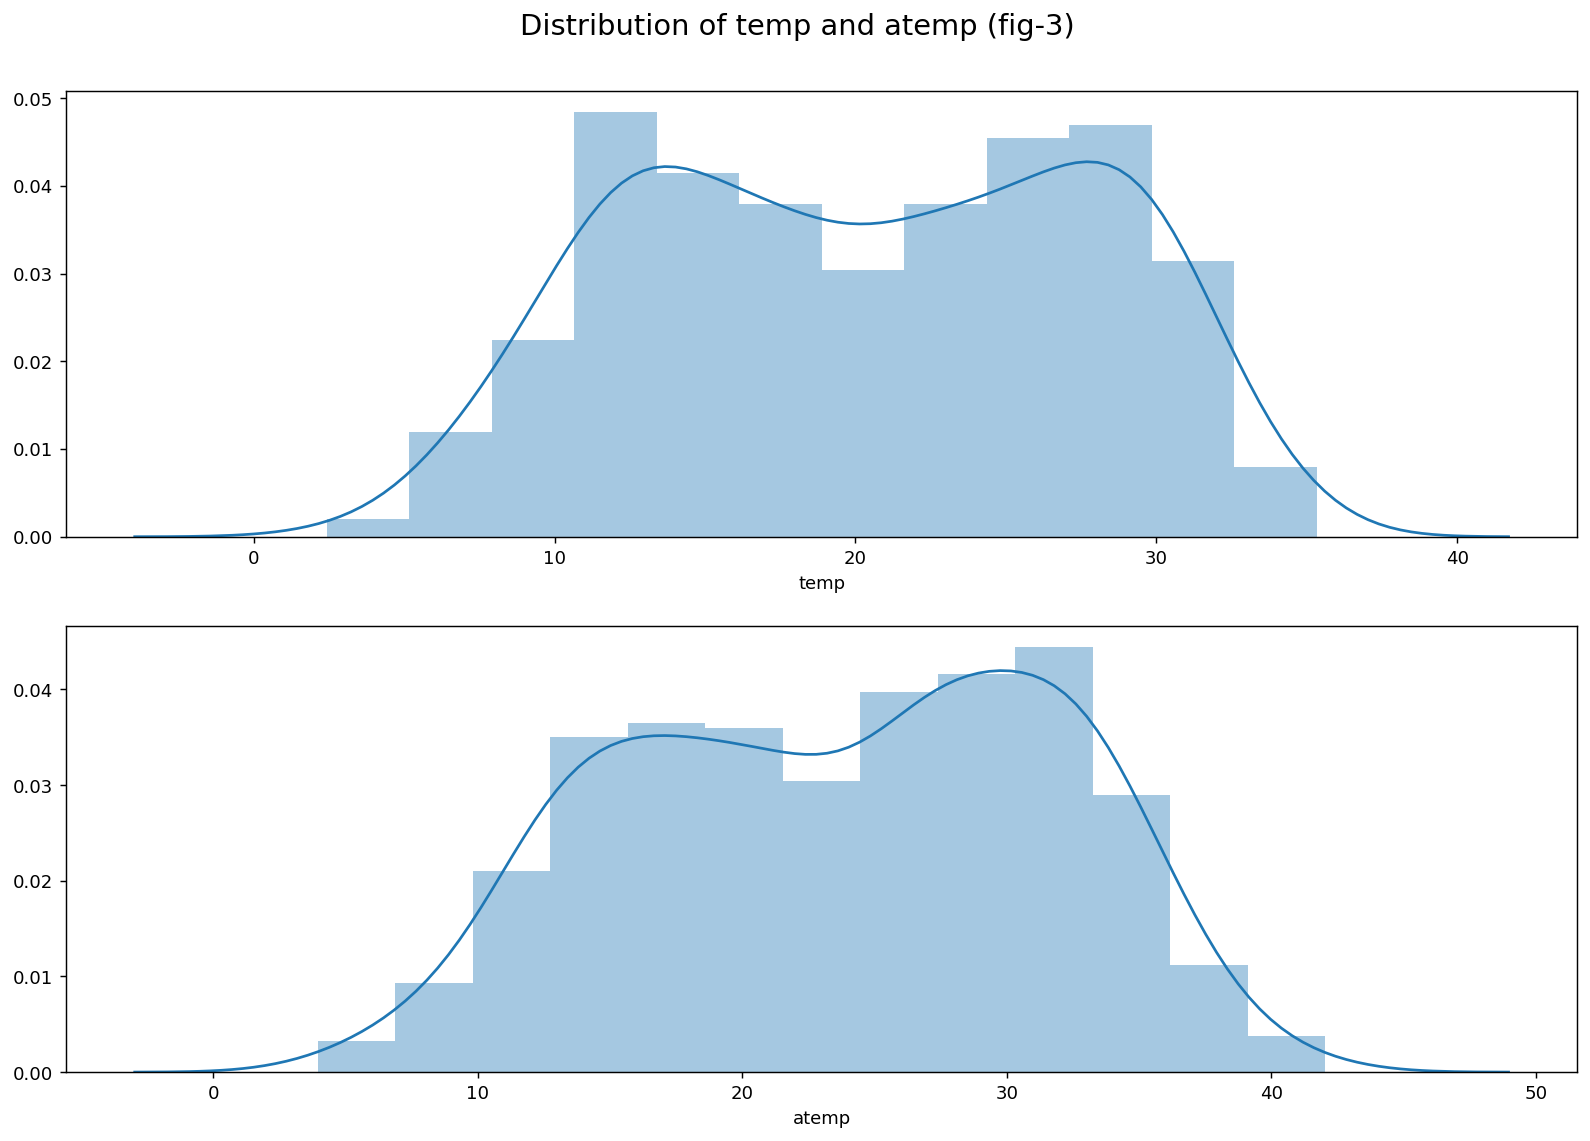

In [11]:
plt.figure(figsize=(15,10),dpi=130)
plt.suptitle("Distribution of temp and atemp (fig-3)",fontsize=16,y=0.94)
plt.subplot(2,1,1)
sns.distplot(day.temp)
plt.subplot(2,1,2)
sns.distplot(day.atemp)
plt.show()

#### As shown in fig-3:
- Both `temp` and `atemp` have two peaks.
- Both `temp` and `atemp` seem to have almost similiar distribution 

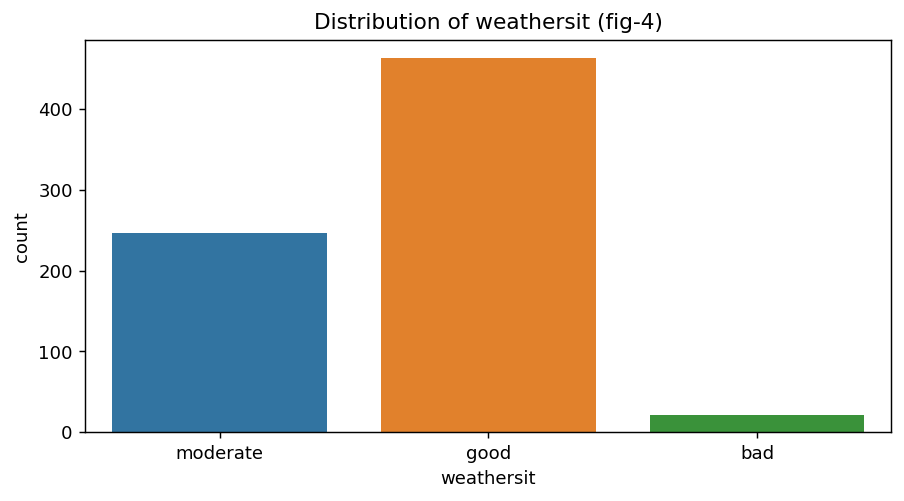

In [12]:
plt.figure(figsize=(8,4),dpi=130)
plt.title("Distribution of weathersit (fig-4)")
sns.countplot(day.weathersit)
plt.show()

#### As shown in fig-4:
- There is very less presence of `bad` weather conditions in the dataset.
- There is no  presence of `severe` weather conditions, also might be result of removing extreme outliers from temp and  hum
- Weather conditions have mostly been `good` in the dataset.

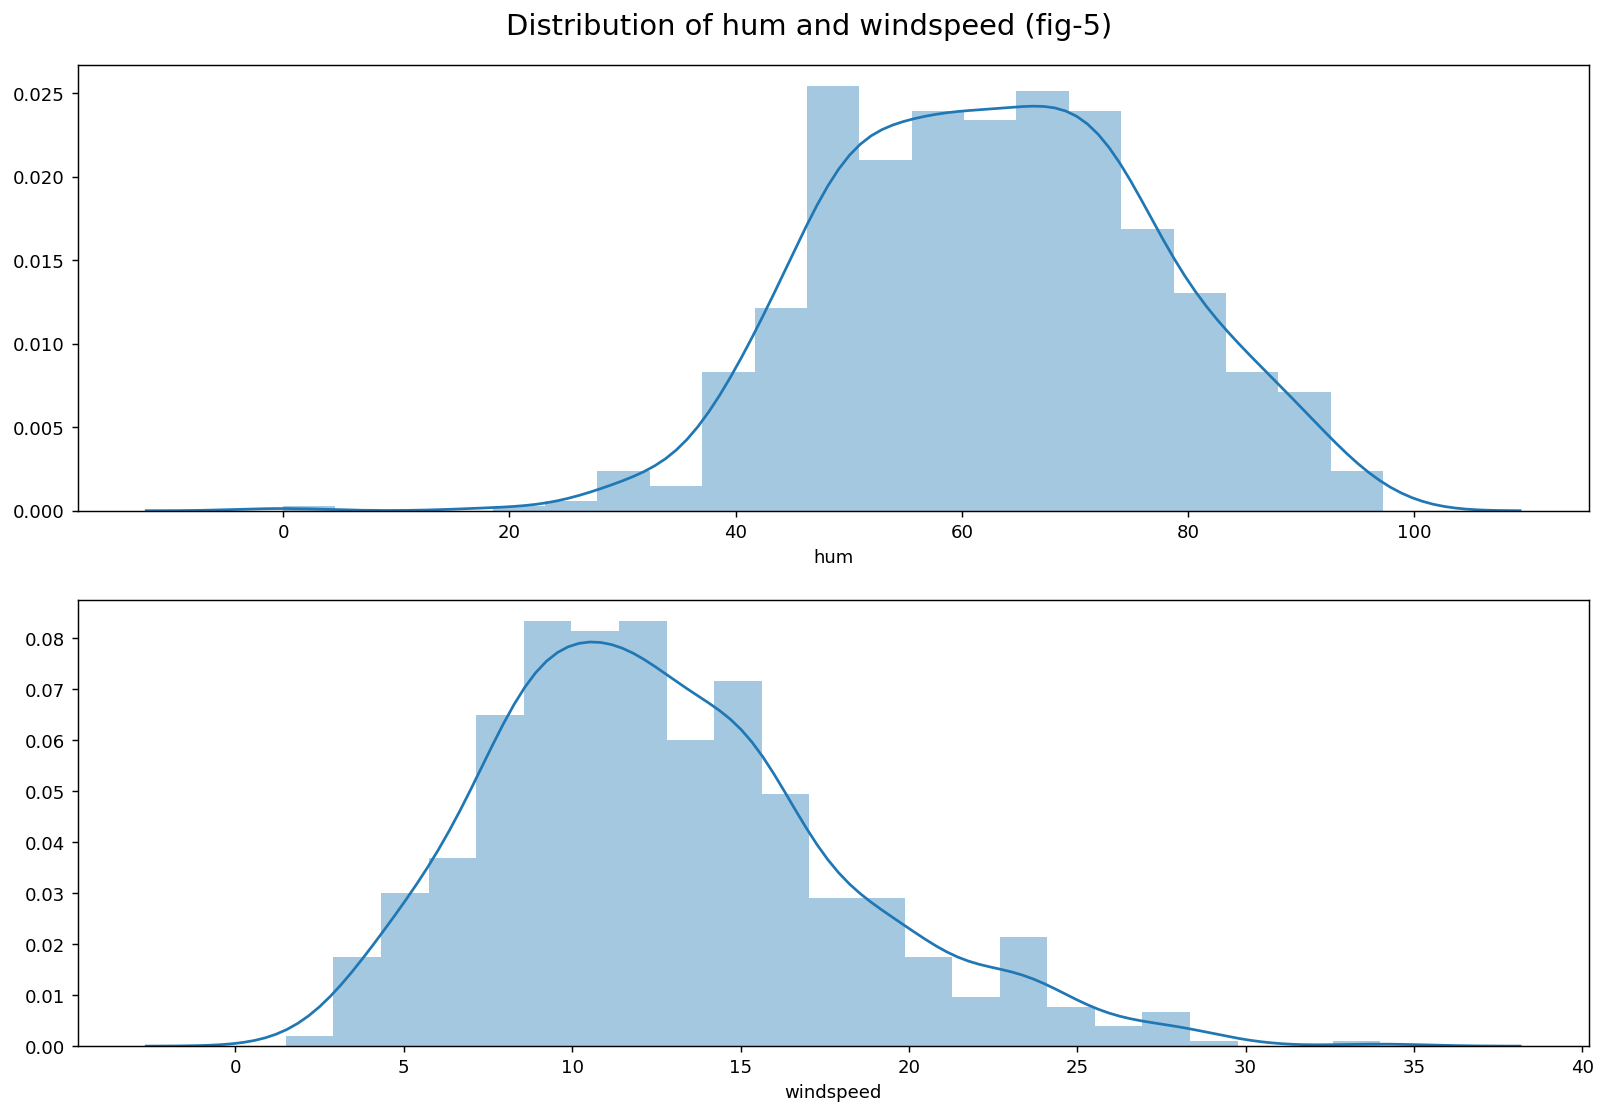

In [13]:
plt.figure(figsize=(15,10),dpi=130)
plt.suptitle("Distribution of hum and windspeed (fig-5)",fontsize=16,y=0.92)
plt.subplot(2,1,1)
sns.distplot(day.hum)
plt.subplot(2,1,2)
sns.distplot(day.windspeed)
plt.show()

#### As shown in fig-5:
- Humidity has mostly been concentrated between 45-80.
- Windspeed has mostly been concentrated between 7.5 to 15.

## Multivariate analysis

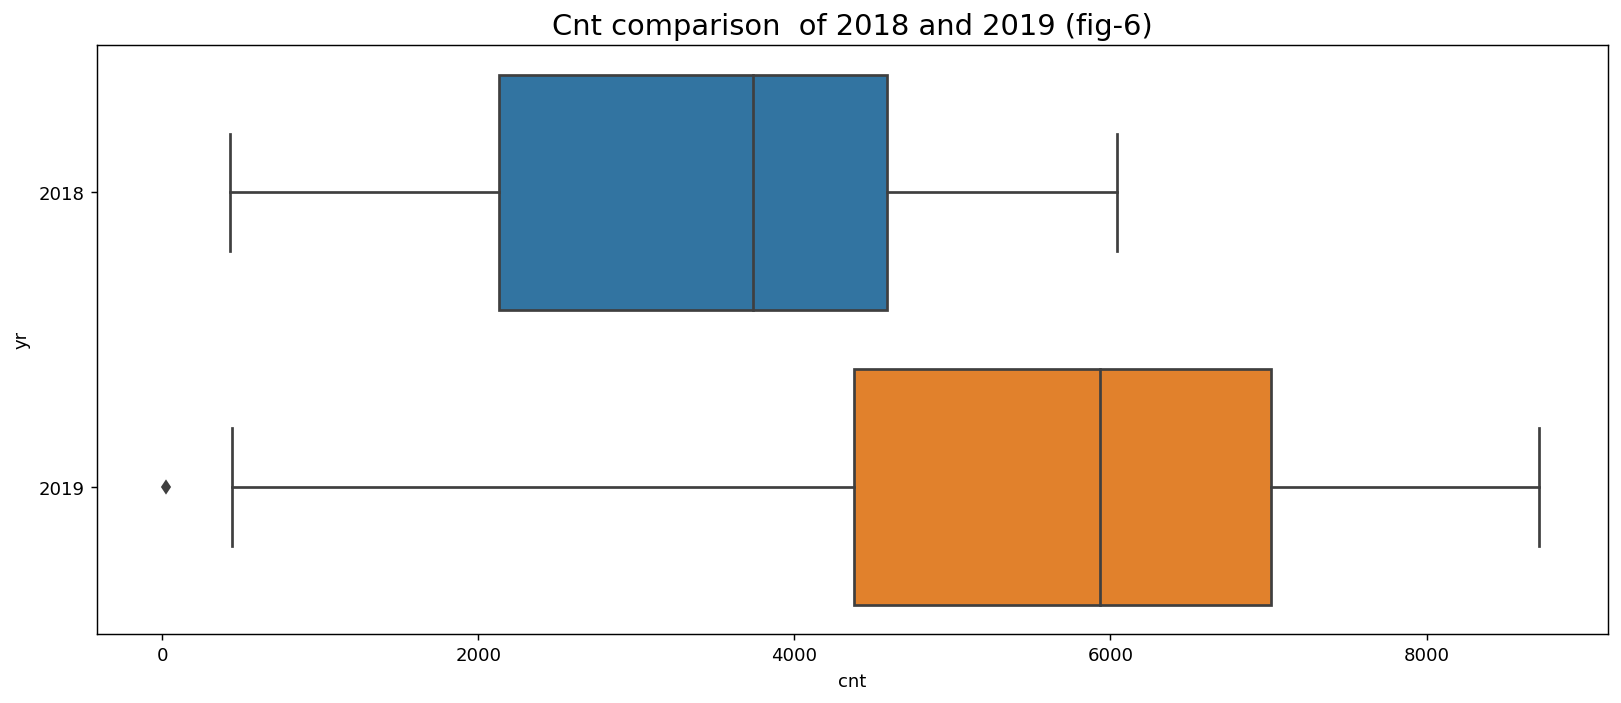

In [14]:
plt.figure(figsize=(15,6),dpi=130)
plt.title("Cnt comparison  of 2018 and 2019 (fig-6)",fontsize=16)
sns.boxplot(data=day,x="cnt",y="yr",orient='h')
plt.yticks([1,0],['2019','2018'])
plt.show()

#### As shown in fig-6:
- 2019 has been best year in terms of demand for bikes.
- Demand for bikes in 2018 was roughly concentrated around 20k to 45k.
- Demand for bikes in 2019 was roughly concentrated around 45k to 70k.

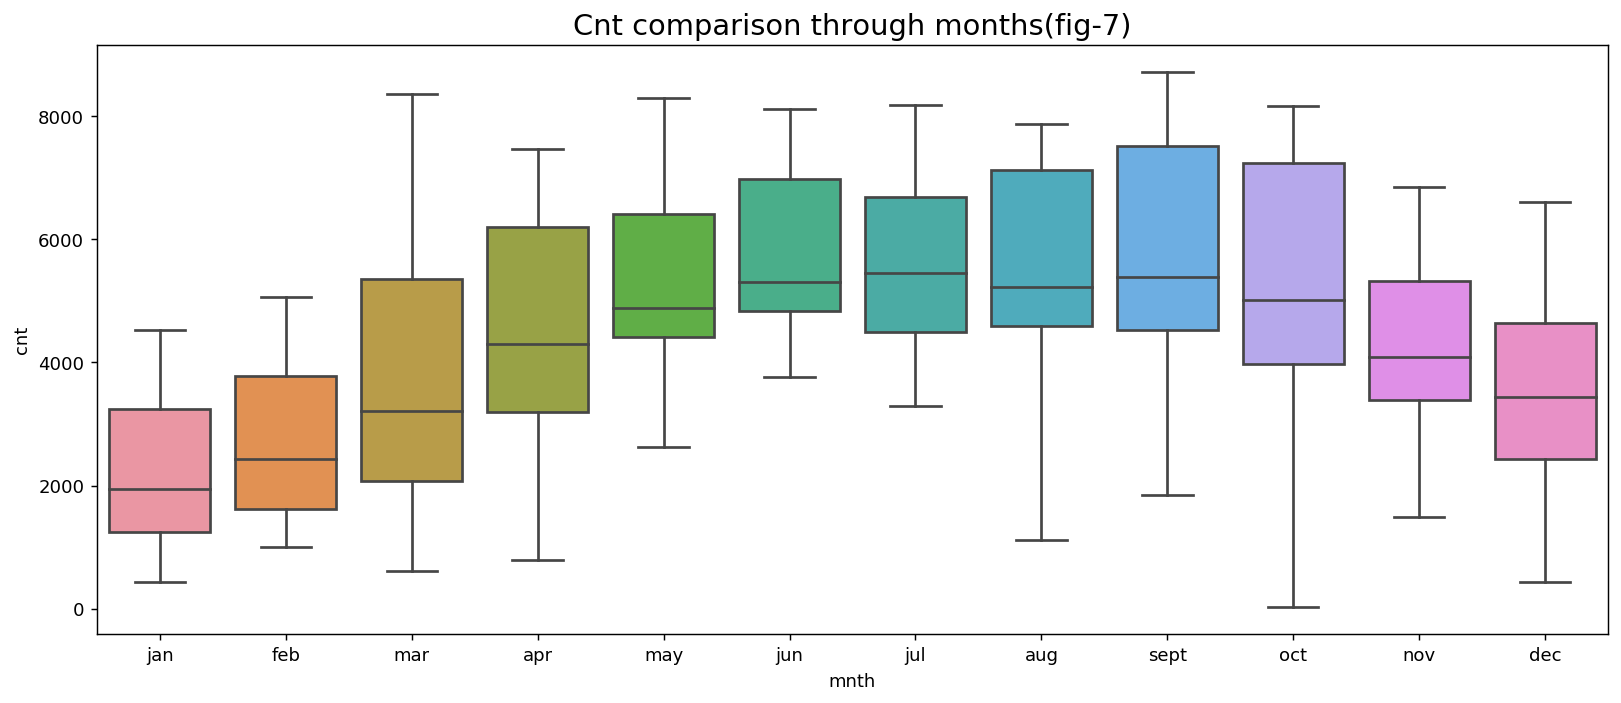

In [15]:
plt.figure(figsize=(15,6),dpi=130)
plt.title("Cnt comparison through months(fig-7)",fontsize=16)
sns.boxplot(data=day,y="cnt",x="mnth",orient='v')
plt.show()

#### As shown in fig-7:
- Demand for bikes was highest during september and lowest during january.
- We can also see the trend where demand is very low at the start of the year and slowly rises till sept and falls down till december.

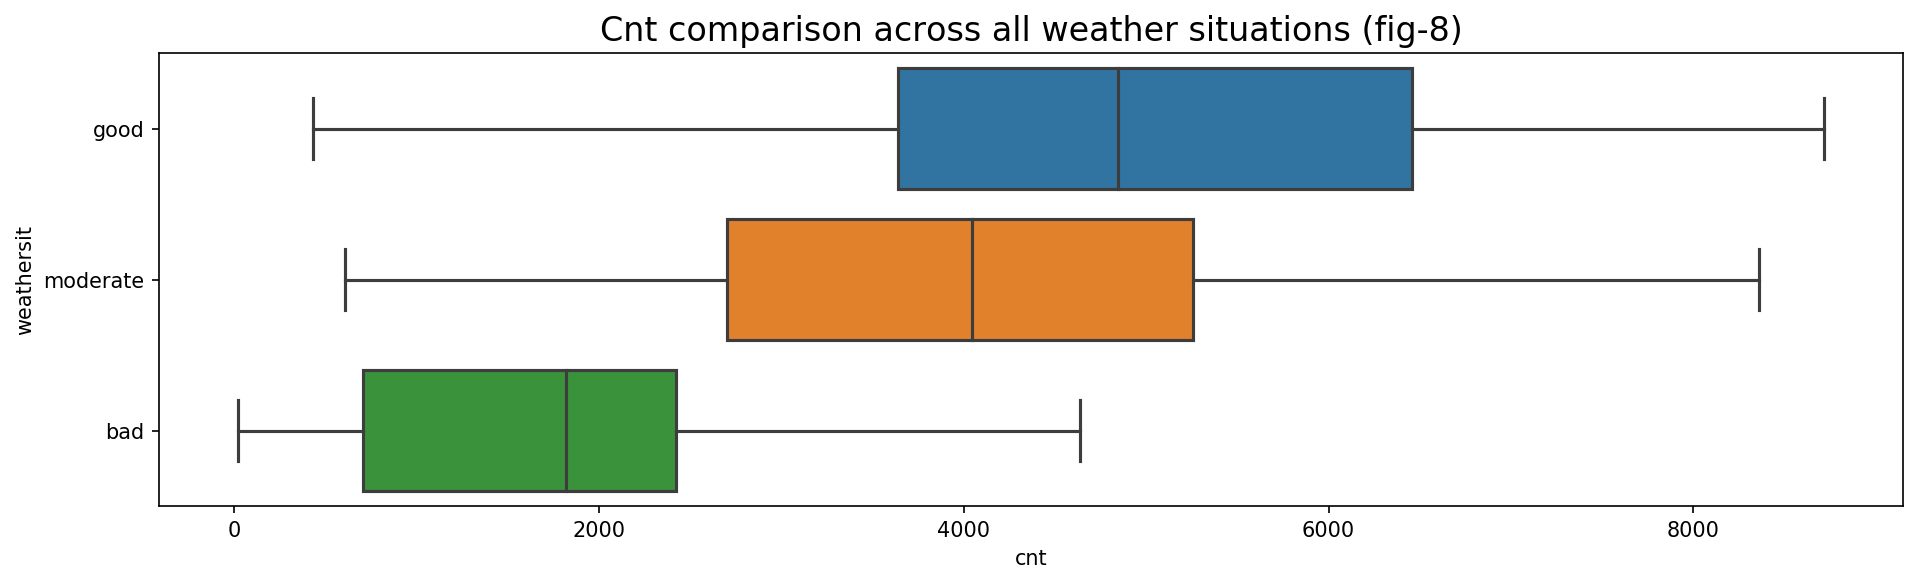

In [16]:
plt.figure(figsize=(15,4),dpi=150)
plt.title("Cnt comparison across all weather situations (fig-8)",fontsize=16)
sns.boxplot(data=day,x="cnt",y="weathersit",orient='h',order=["good","moderate","bad"])
plt.show()

#### As shown in fig-8:
- Demand for bikes is great during Good weather conditions.
- Where as during bad weather it is the lowest.
- So we can see weather situation clearly controls the demand for bikes.

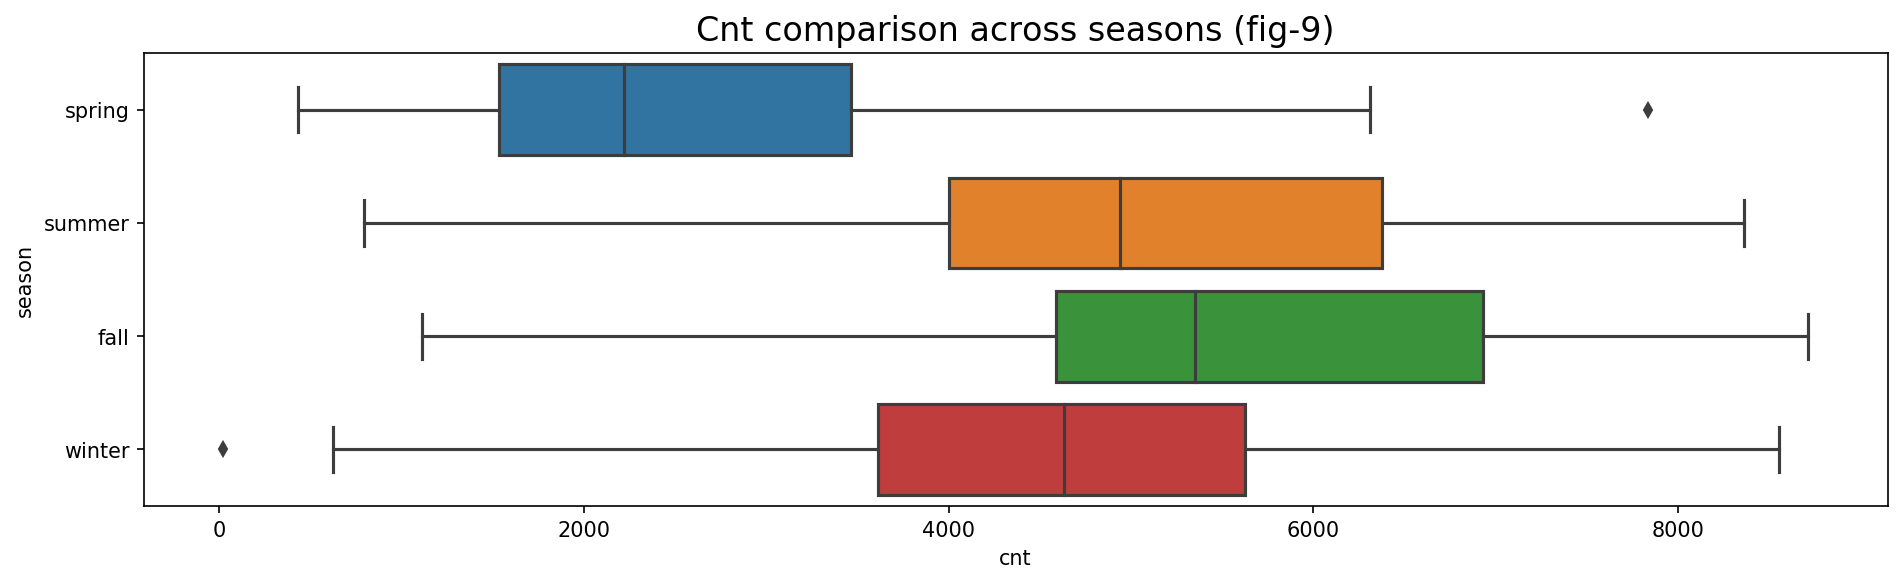

In [17]:
plt.figure(figsize=(15,4),dpi=150)
plt.title("Cnt comparison across seasons (fig-9)",fontsize=16)
sns.boxplot(data=day,x="cnt",y="season",orient='h')
plt.show()

#### As shown in fig-9:
- Spring has the lowest demand for bikes.
- During fall it is the highest

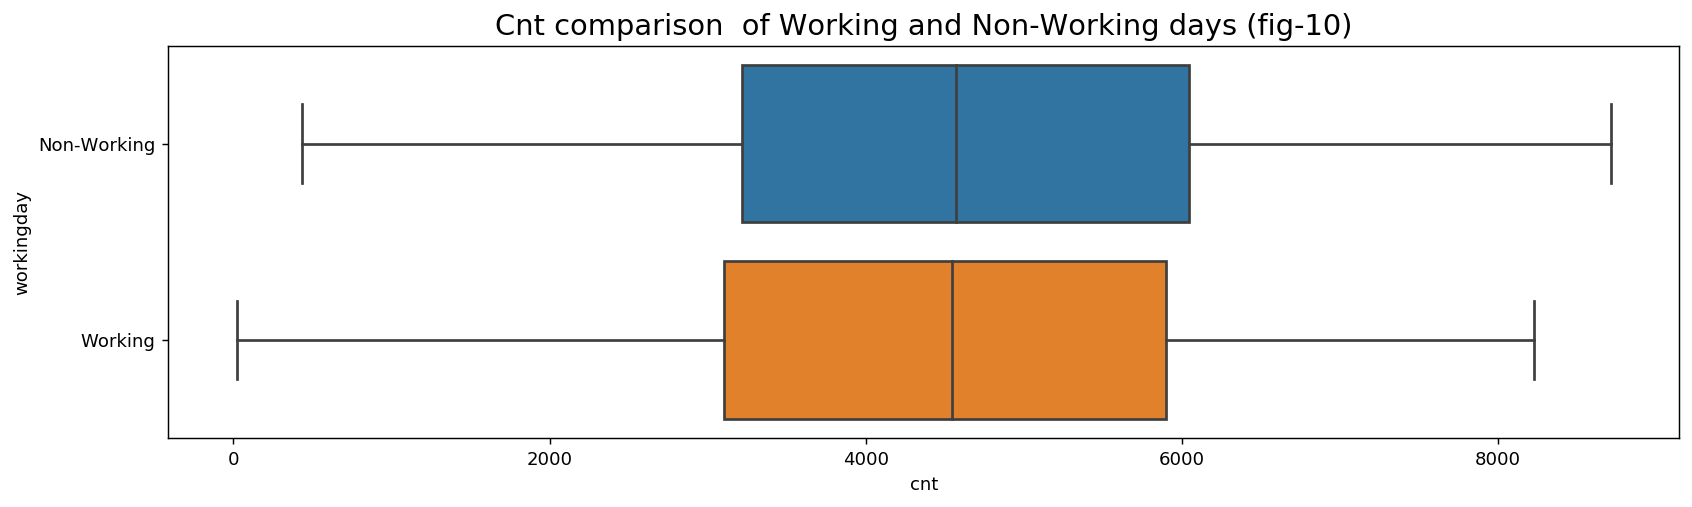

In [18]:
plt.figure(figsize=(15,4),dpi=130)
plt.title("Cnt comparison  of Working and Non-Working days (fig-10)",fontsize=16)
sns.boxplot(data=day,x="cnt",y="workingday",orient='h')
plt.yticks([1,0],['Working','Non-Working'])
plt.show()

#### As shown in fig-10
- We can see that although demand during Non-Working days is higher than Working days the difference is very less to be  any significant.

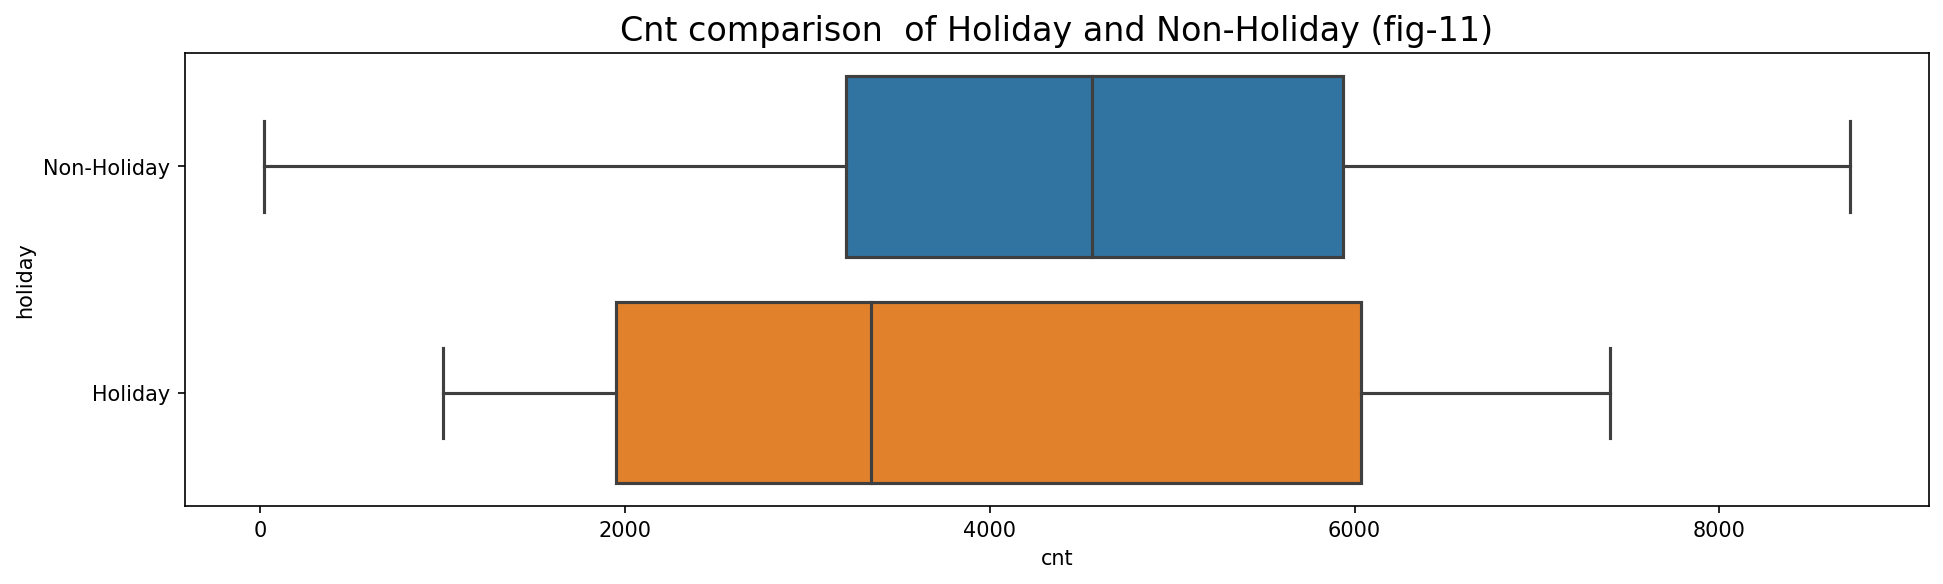

In [19]:
plt.figure(figsize=(15,4),dpi=150)
plt.title("Cnt comparison  of Holiday and Non-Holiday (fig-11)",fontsize=16)
sns.boxplot(data=day,x="cnt",y="holiday",orient='h')
plt.yticks([1,0],['Holiday','Non-Holiday'])
plt.show()

#### As shown in fig-11:
- During Non Holidays the demand for bikes is more around 3.5k to 6k.
- During Holidays it is more spread out around 2k to 6k

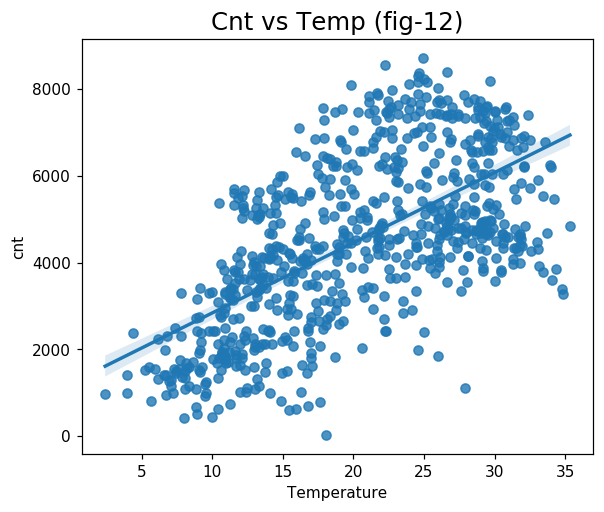

In [20]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp (fig-12)",fontsize=16)
sns.regplot(data=day,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### As shown in the fig-12:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

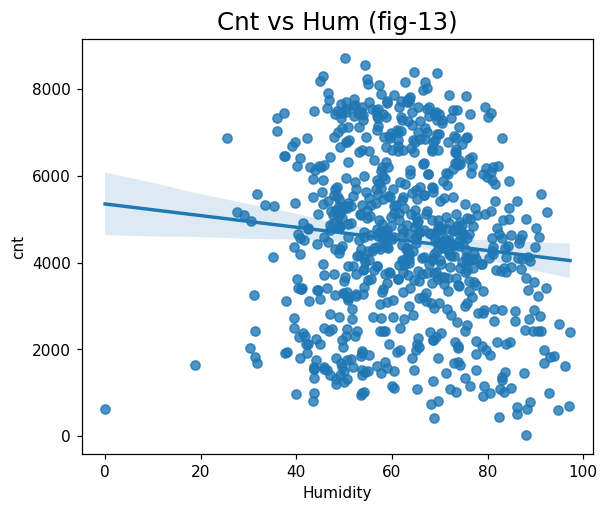

In [21]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum (fig-13)",fontsize=16)
sns.regplot(data=day,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### As shown in fig-13:
- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

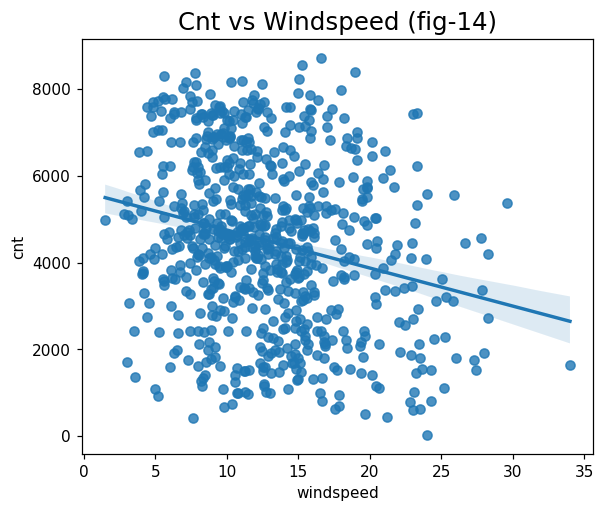

In [22]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed (fig-14)",fontsize=16)
sns.regplot(data=day,y="cnt",x="windspeed")
plt.show()

#### As shown in fig-14:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

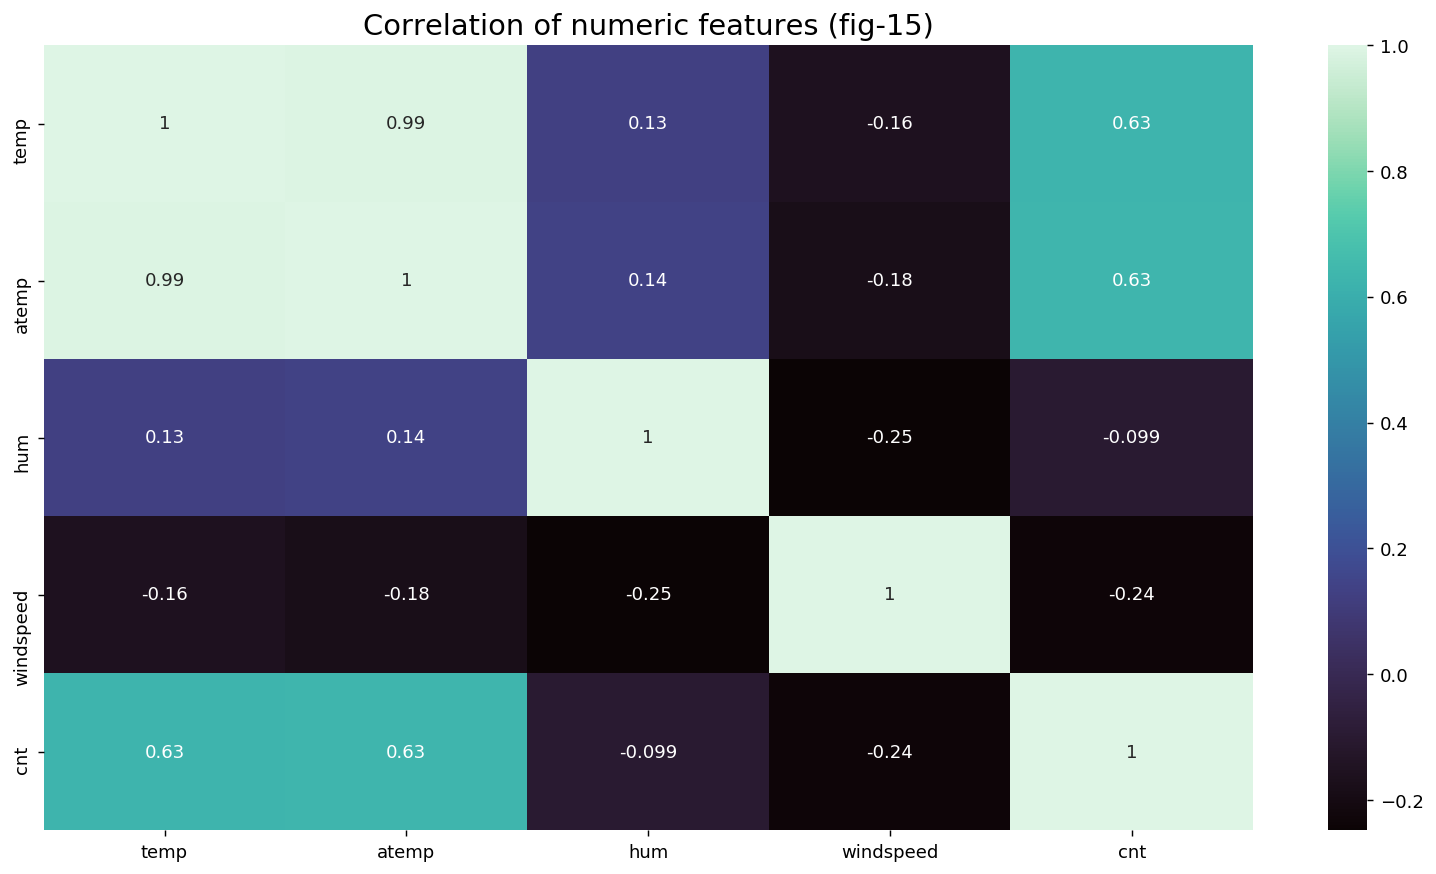

In [23]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features (fig-15)",fontsize=16)
sns.heatmap(day[num_features].corr(),annot= True,cmap="mako")
plt.show()

#### As shown in fig-15:
- Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.

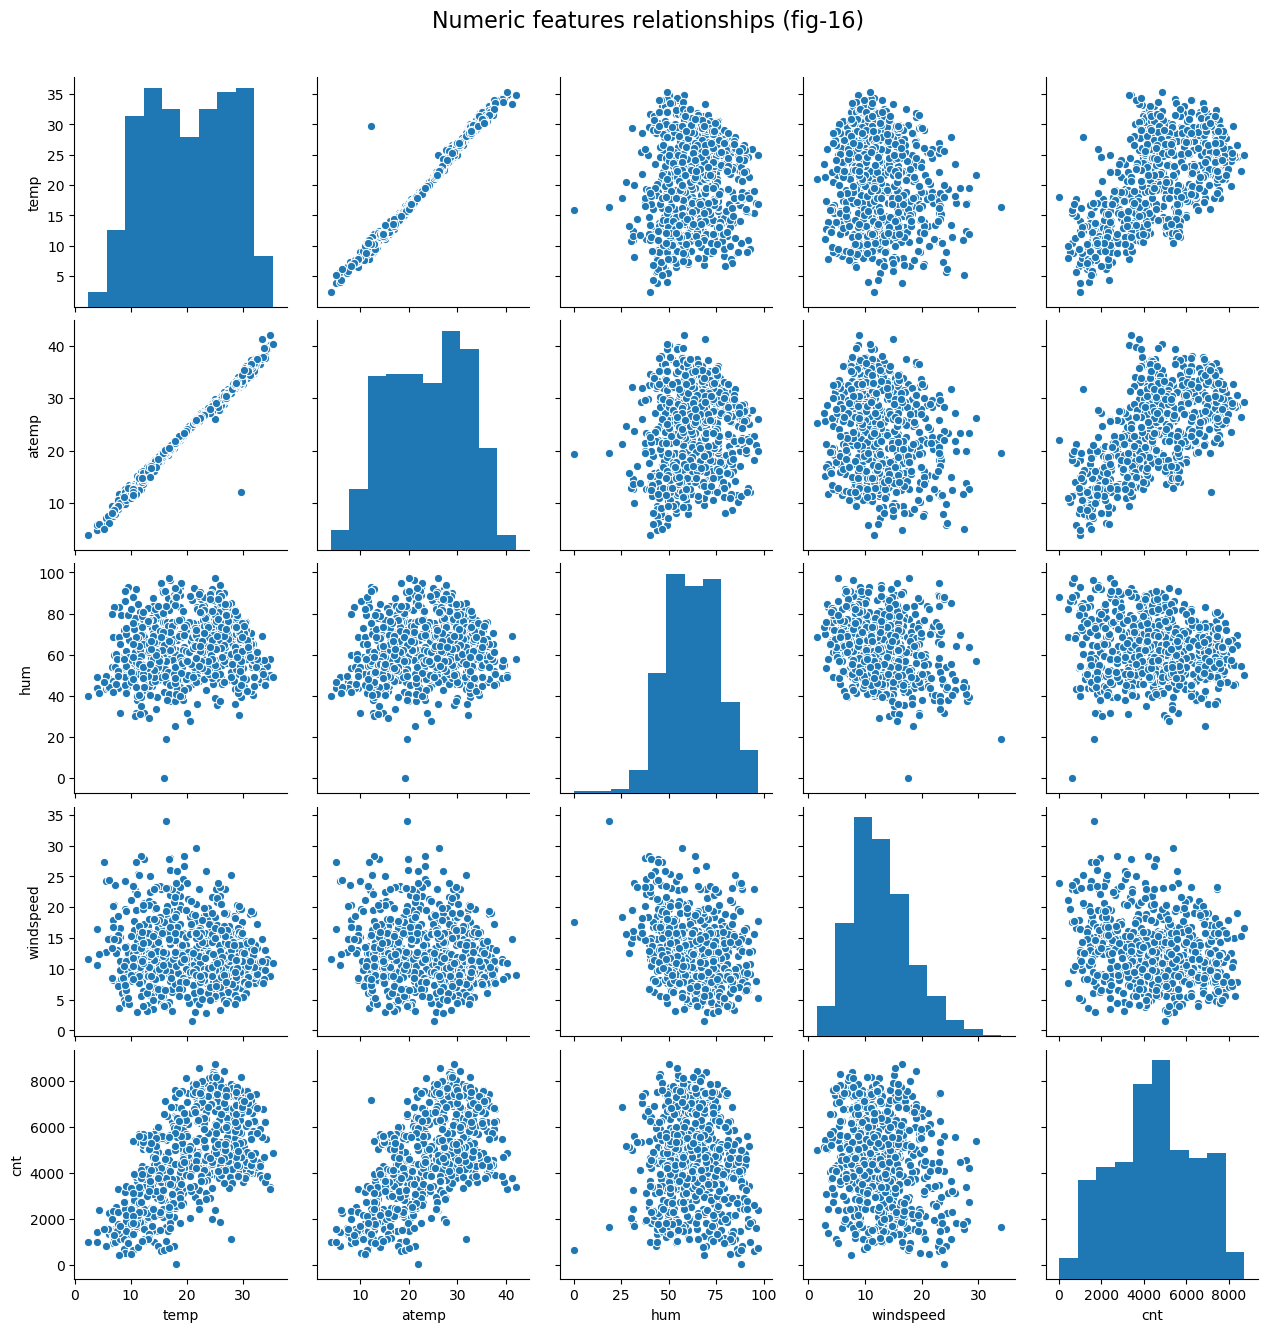

In [24]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
ax = sns.pairplot(day[num_features])
fig = ax.fig
fig.suptitle("Numeric features relationships (fig-16)",fontsize=16,y=1.05)
fig.dpi = 100
plt.show()

## Data Preparation for Linear Regression 

### Generate dummies from categorical variables

In [25]:
day = pd.get_dummies(data=day,columns=["season","mnth","weekday"],drop_first=True)
day = pd.get_dummies(data=day,columns=["weathersit"])

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [26]:
day.head(12)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,8.378268,11.66045,51.8261,6.000868,1606,1,0,...,0,0,1,0,0,0,0,0,1,0
6,0,0,0,8.057402,10.44195,49.8696,11.304642,1510,1,0,...,0,0,0,1,0,0,0,0,0,1
7,0,0,1,6.765000,8.11270,53.5833,17.875868,959,1,0,...,0,1,0,0,0,0,0,0,0,1
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,1,0,0,1,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,...,0,0,0,0,0,0,1,0,1,0


### Train-Test Split

Split the train and test dataset into 70-30 ratio

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
day_train,day_test = train_test_split(day,train_size=0.7,random_state=100)

In [29]:
print(day_train.shape,day_test.shape)

(510, 31) (220, 31)


In [30]:
y_train = day_train.pop("cnt")
X_train = day_train

In [31]:
y_test = day_test.pop("cnt")
X_test = day_test

### Feature Scaling

Use min max scaler to scale values between 0 and 1

In [32]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train.loc[:,:] = scaler.fit_transform(X_train)

### Feature Selection

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### RFE to select top 15 features

In [36]:
lm = LinearRegression()
rfe = RFE(estimator=lm,n_features_to_select=15)

In [37]:
rfe = rfe.fit(X_train,y_train)

In [38]:
pd.DataFrame(zip(X_train.columns,rfe.ranking_,rfe.support_),
             columns=["Features","Ranking","Support"]).sort_values(by="Ranking")

,Features,Ranking,Support
0,yr,1,True
27,weathersit_bad,1,True
20,mnth_sept,1,True
18,mnth_nov,1,True
28,weathersit_good,1,True
13,mnth_jan,1,True
9,season_winter,1,True
8,season_summer,1,True
14,mnth_jul,1,True
6,windspeed,1,True


We can see that following 15 features are selcted from RFE :
- `yr`
- `holiday`
- `temp`
- `hum`
- `windspeed`
- `season_spring`
- `season_summer`
- `season_winter`
- `mnth_jan`
- `mnth_jul`
- `mnth_nov`
- `mnth_sept`
- `weathersit_bad`
- `weathersit_good`
- `weathersit_moderate`

In [39]:
X_train_1 = X_train.loc[:,rfe.support_]

In [40]:
X_train_1.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weathersit_bad,weathersit_good,weathersit_moderate
576,1.0,0.0,0.815169,0.725633,0.264686,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
426,1.0,0.0,0.442393,0.640189,0.255342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,1.0,0.0,0.245101,0.498067,0.663106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
482,1.0,0.0,0.395666,0.504508,0.188475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
111,0.0,0.0,0.345824,0.751824,0.380981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
import statsmodels.api as sm

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [43]:
lm1 = sm.OLS(y_train,sm.add_constant(X_train_1)).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          4.41e-189
Time:                        14:08:08   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1356.2994    

In [44]:
get_vif(X_train_1)

,Features,VIF
13,weathersit_good,49.00
14,weathersit_moderate,32.49
5,season_spring,5.20
12,weathersit_bad,4.16
2,temp,3.97
7,season_winter,3.76
6,season_summer,2.68
3,hum,1.90
8,mnth_jan,1.57
9,mnth_jul,1.49


- mnth_nov clearly has a very high p value of 0.174
- drop mnth_nov from analysis

In [45]:
X_train_2 = X_train_1.drop(columns="mnth_nov")

In [46]:
lm2 = sm.OLS(y_train,sm.add_constant(X_train_2)).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          7.59e-190
Time:                        14:08:09   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1314.6770    

In [47]:
get_vif(X_train_2)

,Features,VIF
12,weathersit_good,48.01
13,weathersit_moderate,31.97
5,season_spring,5.08
11,weathersit_bad,4.13
2,temp,3.89
7,season_winter,3.59
6,season_summer,2.65
3,hum,1.90
8,mnth_jan,1.57
9,mnth_jul,1.49


- We can see that there was no significant drop in R-Squared, so we can infer that mnth_nov was not very significant feature.
- mnth_jan also has a p-value greater than 0.05, lets drop it for the further analysis.

In [48]:
X_train_3 = X_train_2.drop(columns="mnth_jan")

In [49]:
lm3 = sm.OLS(y_train,sm.add_constant(X_train_3)).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.95e-190
Time:                        14:08:09   Log-Likelihood:                -4116.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1243.5729    

In [50]:
get_vif(X_train_3)

,Features,VIF
11,weathersit_good,46.52
12,weathersit_moderate,31.14
5,season_spring,5.02
10,weathersit_bad,4.08
2,temp,3.61
7,season_winter,3.48
6,season_summer,2.62
3,hum,1.89
8,mnth_jul,1.48
9,mnth_sept,1.30


- We can see that there was no significant drop in R-Squared, so we can infer that mnth_jan was not very significant feature.
- Now p-values of all features are less than 0.05, making them significant. Lets compare VIFs so that we can eliminate any correlations between these features.
- Clearly, weathersit_good has a very high VIF, lets drop it from analysis

In [51]:
X_train_4 = X_train_3.drop(columns="weathersit_good")

In [52]:
lm4 = sm.OLS(y_train,sm.add_constant(X_train_4)).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.95e-190
Time:                        14:08:09   Log-Likelihood:                -4116.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2497.0845    

- We can see that there has been approximately no change in R-Squared and Adj. R-Squared values
- Let's analyze VIF again

In [53]:
get_vif(X_train_4)

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,season_spring,4.01
7,season_winter,3.33
6,season_summer,2.79
11,weathersit_moderate,2.28
0,yr,2.08
8,mnth_jul,1.58
9,mnth_sept,1.38


- We can see that hum has very high VIF value, which is greater than acceptable value of 5.

In [54]:
X_train_5 = X_train_4.drop(columns="hum")

In [55]:
lm5 = sm.OLS(y_train,sm.add_constant(X_train_5)).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          5.06e-187
Time:                        14:08:09   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1755.4766    

- There has been a small dip in R-squared, but not very significantly.
- We can continue with analyzing VIF.

In [56]:
get_vif(X_train_5)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.78
7,mnth_jul,1.58
10,weathersit_moderate,1.55
8,mnth_sept,1.34
9,weathersit_bad,1.08


- We can drop temp as its VIF value is still greater than acceptable value of 5.

In [57]:
X_train_6 = X_train_5.drop(columns="temp")

In [58]:
lm6 = sm.OLS(y_train,sm.add_constant(X_train_6)).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          5.02e-149
Time:                        14:08:09   Log-Likelihood:                -4219.6
No. Observations:                 510   AIC:                             8461.
Df Residuals:                     499   BIC:                             8508.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5095.6126    

In [59]:
get_vif(X_train_6)

,Features,VIF
2,windspeed,3.81
3,season_spring,2.07
4,season_summer,2.01
0,yr,1.83
5,season_winter,1.73
9,weathersit_moderate,1.52
6,mnth_jul,1.19
7,mnth_sept,1.16
8,weathersit_bad,1.08
1,holiday,1.04


- we can see that mnth_jul has a very high p value drop it.
- Also we can see a very significant drop in the R-squared value.

In [60]:
X_train_7 = X_train_6.drop(columns="mnth_jul")

In [61]:
lm7 = sm.OLS(y_train,sm.add_constant(X_train_7)).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.8
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          4.30e-150
Time:                        14:08:10   Log-Likelihood:                -4219.8
No. Observations:                 510   AIC:                             8460.
Df Residuals:                     500   BIC:                             8502.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5054.6508    

In [62]:
get_vif(X_train_7)

,Features,VIF
2,windspeed,3.46
3,season_spring,1.91
4,season_summer,1.86
0,yr,1.77
5,season_winter,1.63
8,weathersit_moderate,1.51
6,mnth_sept,1.14
7,weathersit_bad,1.08
1,holiday,1.04


- We can see that Both p values and VIF values of the features are in the acceptable range.
- But the R squared has not improved.
- Let's add `temp` back as it had very high correlation value with `cnt`.

In [63]:
X_train_8 = pd.concat([X_train_7,X_train[['temp']]],axis=1)

In [64]:
lm8 = sm.OLS(y_train,sm.add_constant(X_train_8)).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          1.47e-186
Time:                        14:08:10   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1680.9085    

In [65]:
get_vif(X_train_8)

,Features,VIF
2,windspeed,4.60
9,temp,3.84
0,yr,2.07
3,season_spring,1.99
4,season_summer,1.90
5,season_winter,1.63
8,weathersit_moderate,1.55
6,mnth_sept,1.23
7,weathersit_bad,1.08
1,holiday,1.04


- We can see that Both p values and VIF values of the features are in the acceptable range.
- But the R squared has not improved very signifiantly and it is close to R-squared of the model generated after selecting features from RFE.

In [66]:
selected_features = X_train_8.columns
final_model = lm8
print(selected_features)

Index(['yr', 'holiday', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_sept', 'weathersit_bad', 'weathersit_moderate',
       'temp'],
      dtype='object')


### Features finally selected
- `yr`
- `holiday`
- `windspeed`
- `season_spring`
- `season_summer`
- `season_winter`
- `mnth_sept`
- `weathersit_bad`
- `weathersit_moderate`
- `temp`

## Residual Analysis

In [67]:
y_train_pred = sm.add_constant(X_train[selected_features])@final_model.params
residual = y_train - y_train_pred 

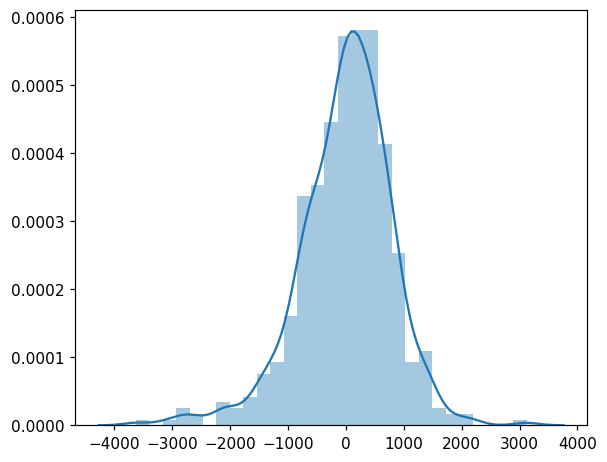

In [68]:
plt.figure(figsize=(6,5),dpi=110)
sns.distplot(residual)
plt.show()

- We can see that residuals are normally distributed with mean around 0.

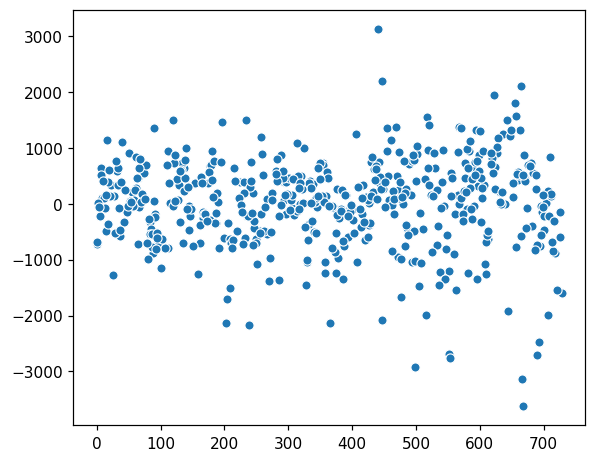

In [69]:
plt.figure(figsize=(6,5),dpi=110)
sns.scatterplot(y = residual, x = residual.index)
plt.show()

- It can be observed that residuals are independant of each other.
- They have a constant variance (Homoscedacity)

## Test the model

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [71]:
X_test = pd.DataFrame(columns=X_test.columns,data=scaler.transform(X_test))

In [72]:
y_test_pred = sm.add_constant(X_test[selected_features]) @ final_model.params

In [73]:
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
round(r2,4)

0.8038

#### R-Squared : 
0.8038

In [74]:
n = X_test.shape[0]
p = len(selected_features)
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
round(adj_r2,4)

0.7944

#### Adj. R-squared :
0.7944    

In [75]:
import math
round(math.sqrt(mean_squared_error(y_true=y_test,y_pred=y_test_pred)),2)

841.83

#### RMSE :
841.83